In [26]:
from sklearn.datasets import load_breast_cancer

In [27]:
breast = load_breast_cancer()

In [28]:
breast_data = breast.data

In [29]:
breast_data.shape

(569, 30)

In [30]:
breast_labels = breast.target

In [31]:
import numpy as np

In [32]:
labels = np.reshape(breast_labels,(569,1))

In [33]:
final_breast_data = np.concatenate([breast_data,labels], axis=1)

In [34]:
final_breast_data.shape

(569, 31)

In [35]:
import pandas as pd

In [36]:
breast_dataset = pd.DataFrame(final_breast_data)

In [37]:
features = breast.feature_names

In [38]:
features_labels = np.append(features,'label')

In [39]:
breast_dataset.columns = features_labels

In [51]:
breast_dataset['label'].replace(0, 'Benign', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Benign


In [41]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [42]:
x.shape

(569, 30)

In [43]:
feat_cols = ['features'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,features0,features1,features2,features3,features4,features5,features6,features7,features8,features9,...,features20,features21,features22,features23,features24,features25,features26,features27,features28,features29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [44]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [47]:
principal_breast_Df = pd.DataFrame(data=principalComponents_breast,
                                  columns=['principal component 1',
                                          'principal component 2'])
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [48]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


KeyError: 'Benign'

<Figure size 432x288 with 0 Axes>

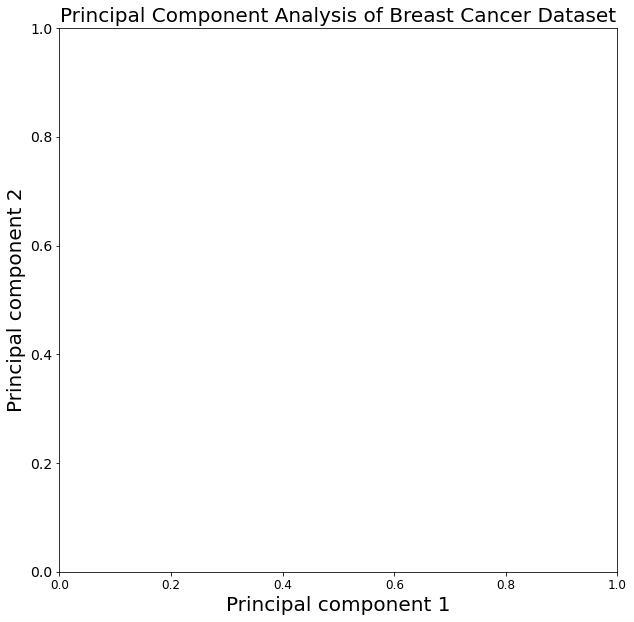

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xlabel('Principal component 1', fontsize=20)
plt.ylabel('Principal component 2', fontsize=20)
plt.title('Principal Component Analysis of Breast Cancer Dataset', fontsize =20)
targets= ['Benign', 'Malignant']
colors = ['r','g']

for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label']=target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 
                                        'principal component 1']
               ,principal_breast_Df.loc[indicesToKeep, 
                                        'principal component 2'],
                c=color, s = 50)

plt.legend(targets, prop={'size = 15'})
plt.show()